In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"..\Data\SAdata\2012_A.csv")

In [3]:
df.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
0,BTW001,12005762,2012-10-01 00:00:00,1.200000,1.0
1,BTW001,12005762,2012-10-01 01:00:00,1.300000,1.0
2,BTW001,12005762,2012-10-01 02:00:00,1.216667,1.0
3,BTW001,12005762,2012-10-01 03:00:00,1.233333,1.0
4,BTW001,12005762,2012-10-01 04:00:00,1.316667,1.0


The unitsread are in Amps, to get them in kWh, we multiply by the South Africa Voltage (as it is 1 hour timestamps) and divide by 1000

In [364]:
df["Unitsread"] = df["Unitsread"]*220/1000

In [365]:
df.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
0,BTW001,12005762,2012-10-01 00:00:00,0.264000,1.0
1,BTW001,12005762,2012-10-01 01:00:00,0.286000,1.0
2,BTW001,12005762,2012-10-01 02:00:00,0.267667,1.0
3,BTW001,12005762,2012-10-01 03:00:00,0.271333,1.0
4,BTW001,12005762,2012-10-01 04:00:00,0.289667,1.0


In [366]:
#Lengths of Profile ID groups
groups1 = df.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))
groups1 = groups1.sort_values(ascending = False)
print(groups1.head())
len(groups1)

ProfileID
12006364    8769
12006416    8769
12006299    8769
12006303    8769
12006433    8769
Name: Unitsread, dtype: int64


1587

We can see that the right ID is the profile ID. There is however not exactly 8760 values, lets plot the number of values for each ID to get more insight

1587


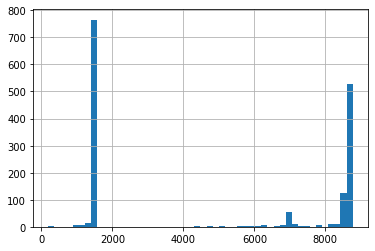

In [367]:
#groups1 = groups1[groups1<2000]
#groups1 = groups1[groups1 > 1400]

print(len(groups1))

groups1.hist(bins = 50)




There is an enormous peak around 1500 datapoints. As this represents 1.5x more households as the complete households, it is interesting to understand what is happening. 




## Analysing the peak at 1500 datapoints

In [368]:
less_data = groups1[groups1<2000]
less_data = less_data[less_data>1450]

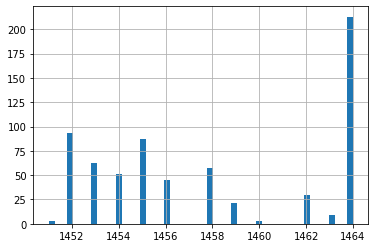

In [369]:
less_data.hist(bins = 50)

In [370]:
ld = df[df["ProfileID"].isin(less_data.index)]

In [371]:
ld.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid
1138464,BTW001,12019685,2012-11-01 00:00:00,1.272333,1.0
1138465,BTW001,12019685,2012-11-01 01:00:00,0.564667,1.0
1138466,BTW001,12019685,2012-11-01 02:00:00,0.264000,1.0
1138467,BTW001,12019685,2012-11-01 03:00:00,0.319000,1.0
1138468,BTW001,12019685,2012-11-01 04:00:00,0.264000,1.0


In [372]:
ld.ProfileID.unique()

array([12019685, 12019689, 12019693, 12019698, 12019702, 12019706,
       12019711, 12019715, 12019719, 12019724, 12019728, 12019732,
       12019737, 12019741, 12019745, 12019750, 12019754, 12019758,
       12019763, 12019767, 12019771, 12019776, 12019780, 12019784,
       12019789, 12019793, 12019797, 12019802, 12019806, 12019810,
       12019815, 12019819, 12019823, 12019828, 12019832, 12019836,
       12019841, 12019845, 12019849, 12019854, 12019858, 12019862,
       12019867, 12019871, 12019875, 12019880, 12019884, 12019888,
       12019893, 12019897, 12019901, 12019906, 12019910, 12019914,
       12019919, 12019923, 12019927, 12019932, 12019936, 12019940,
       12019945, 12019949, 12019953, 12019958, 12019962, 12019966,
       12019971, 12019975, 12019979, 12019984, 12019988, 12019992,
       12019997, 12020001, 12020005, 12020010, 12020014, 12020018,
       12020023, 12020027, 12020031, 12020036, 12020040, 12020044,
       12020049, 12020053, 12020057, 12020062, 12020066, 12020

In [373]:
ld["date"] = pd.to_datetime(df["Datefield"]).dt.date

C:\Users\Kirsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [374]:
ld["Month"] = pd.to_datetime(df["Datefield"]).dt.month

C:\Users\Kirsch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Select a random ID from the sub set

In [375]:
ld1 = ld[ld["ProfileID"] == 12020725]

In [376]:
ld1.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,date,Month
1309065,HKY020,12020725,2012-11-01 00:00:00,0.0,1.0,2012-11-01,11
1309066,HKY020,12020725,2012-11-01 01:00:00,0.0,1.0,2012-11-01,11
1309067,HKY020,12020725,2012-11-01 02:00:00,0.0,1.0,2012-11-01,11
1309068,HKY020,12020725,2012-11-01 03:00:00,0.0,1.0,2012-11-01,11
1309069,HKY020,12020725,2012-11-01 04:00:00,0.0,1.0,2012-11-01,11


In [377]:
day = ld1.groupby("date")['Unitsread'].apply(lambda x: len(x))


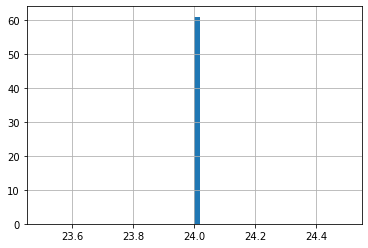

In [378]:
day.hist(bins = 50)

All days for this household have 24 entries - full days are missing not hours in a day

In [379]:
ld1.head()


,RecorderID,ProfileID,Datefield,Unitsread,Valid,date,Month
1309065,HKY020,12020725,2012-11-01 00:00:00,0.0,1.0,2012-11-01,11
1309066,HKY020,12020725,2012-11-01 01:00:00,0.0,1.0,2012-11-01,11
1309067,HKY020,12020725,2012-11-01 02:00:00,0.0,1.0,2012-11-01,11
1309068,HKY020,12020725,2012-11-01 03:00:00,0.0,1.0,2012-11-01,11
1309069,HKY020,12020725,2012-11-01 04:00:00,0.0,1.0,2012-11-01,11


In [380]:
month = ld1.groupby("Month")['Unitsread'].apply(lambda x: len(x))
month.head()

Month
11    720
12    744
Name: Unitsread, dtype: int64

There is only November and December data 

## Formatting the dataset 


In [381]:
group = df.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))
group = group.sort_values(ascending = False)

In [382]:
group = group[group>8700]
len(group)

480

In [383]:
ndf= df[df["ProfileID"].isin(group.index)]

In [384]:
grp = ndf.groupby("ProfileID")['Unitsread'].sum()

len(grp[grp == 0])

92

In [385]:
grp = grp[grp>1]

print(len(grp))

ndf = ndf[ndf["ProfileID"].isin(grp.index)]

387


In [386]:
year = pd.date_range("01/01/2012 00:00", "31/12/2012 23:00", freq="1h")

ndf2 = ndf

d = [None]*387
add = [None]*387
ids = list(grp.index)
for i in range(len(ids)):
    d[i] = df[df["ProfileID"] == ids[i]]
    r = list(d[i]["Datefield"])
    years = [x.strftime("%Y-%m-%d %H:%M:%S") for x in year]
    main_list = np.setdiff1d(list(years),r)
    add[i] = pd.DataFrame({"RecorderID": "BTW001", "ProfileID":ids[i], "Datefield": main_list,"Unitsread": np.nan, "Valid": 1})
    print(len(add[i])+len(r)-8784)
    ndf2 = ndf2.append(add[i])
    
ndf2 = ndf2.sort_values(['ProfileID', 'Datefield'])

ndf2 = ndf2.reset_index(drop = True)



0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [387]:
len(ndf2)/8784

387.0

In [388]:
group1 = ndf2.groupby("ProfileID")['Unitsread'].apply(lambda x: len(x))

In [389]:
group1.head()

ProfileID
12005372    8784
12005376    8784
12005385    8784
12005389    8784
12005398    8784
Name: Unitsread, dtype: int64

We now have full households

## Having mean hourly data per weekday per season

### Getting all the info we need 

In [390]:
ndf2["Month"] = pd.to_datetime(ndf2["Datefield"]).dt.month
ndf2["Hour"] = pd.to_datetime(ndf2["Datefield"]).dt.hour


In [391]:
ndf2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,Month,Hour
0,LUK002,12005372,2012-01-01 00:00:00,0.0,0.0,1,0
1,LUK002,12005372,2012-01-01 01:00:00,0.0,0.0,1,1
2,LUK002,12005372,2012-01-01 02:00:00,0.0,0.0,1,2
3,LUK002,12005372,2012-01-01 03:00:00,0.0,0.0,1,3
4,LUK002,12005372,2012-01-01 04:00:00,0.0,0.0,1,4


Careful, the seasons are opposite to the London seasons

In [392]:
season = ndf2["Month"].where(
    (ndf2["Month"] != 12), 'Summer').where(
    (ndf2["Month"] != 1), 'Summer').where(
    (ndf2["Month"] != 2), 'Summer').where(
    (ndf2["Month"] != 3), 'Autumn').where(
    (ndf2["Month"] != 4), 'Autumn').where(
    (ndf2["Month"] != 5), 'Autumn').where(
    (ndf2["Month"] != 6), 'Winter').where(
    (ndf2["Month"] != 7), 'Winter').where(
    (ndf2["Month"] != 8), 'Winter').where(
    (ndf2["Month"] != 9), 'Spring').where(
    (ndf2["Month"] != 10), 'Spring').where(
    (ndf2["Month"] != 11), 'Spring')

In [393]:
season.unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [394]:
ndf2["Season"] = season

In [395]:
ndf2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,Month,Hour,Season
0,LUK002,12005372,2012-01-01 00:00:00,0.0,0.0,1,0,Summer
1,LUK002,12005372,2012-01-01 01:00:00,0.0,0.0,1,1,Summer
2,LUK002,12005372,2012-01-01 02:00:00,0.0,0.0,1,2,Summer
3,LUK002,12005372,2012-01-01 03:00:00,0.0,0.0,1,3,Summer
4,LUK002,12005372,2012-01-01 04:00:00,0.0,0.0,1,4,Summer


In [396]:
ndf2["Weekday"] = pd.to_datetime(ndf2["Datefield"]).dt.weekday

In [397]:
ndf2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,Month,Hour,Season,Weekday
0,LUK002,12005372,2012-01-01 00:00:00,0.0,0.0,1,0,Summer,6
1,LUK002,12005372,2012-01-01 01:00:00,0.0,0.0,1,1,Summer,6
2,LUK002,12005372,2012-01-01 02:00:00,0.0,0.0,1,2,Summer,6
3,LUK002,12005372,2012-01-01 03:00:00,0.0,0.0,1,3,Summer,6
4,LUK002,12005372,2012-01-01 04:00:00,0.0,0.0,1,4,Summer,6


In [398]:
ndf2["Weekday"] = ndf2["Weekday"].where(
    (ndf2["Weekday"] != 0), 'Monday').where(
    (ndf2["Weekday"] != 1), 'Tuesday').where(
    (ndf2["Weekday"] != 2), 'Wednesday').where(
    (ndf2["Weekday"] != 3), 'Thursday').where(
    (ndf2["Weekday"] != 4), 'Friday').where(
    (ndf2["Weekday"] != 5), 'Saturday').where(
    (ndf2["Weekday"] != 6), 'Sunday')

In [399]:
ndf2.head()

,RecorderID,ProfileID,Datefield,Unitsread,Valid,Month,Hour,Season,Weekday
0,LUK002,12005372,2012-01-01 00:00:00,0.0,0.0,1,0,Summer,Sunday
1,LUK002,12005372,2012-01-01 01:00:00,0.0,0.0,1,1,Summer,Sunday
2,LUK002,12005372,2012-01-01 02:00:00,0.0,0.0,1,2,Summer,Sunday
3,LUK002,12005372,2012-01-01 03:00:00,0.0,0.0,1,3,Summer,Sunday
4,LUK002,12005372,2012-01-01 04:00:00,0.0,0.0,1,4,Summer,Sunday


### Isolating the seasons and creating the mean profiles

In [400]:
summer = ndf2[ndf2["Season"] == "Summer"]
winter = ndf2[ndf2["Season"] == "Winter"]
autumn = ndf2[ndf2["Season"] == "Autumn"]
spring = ndf2[ndf2["Season"] == "Spring"]

##### Summer

In [401]:
summer_mean_gb = summer.groupby(["ProfileID","Weekday","Hour"])['Unitsread'].apply(lambda x: np.mean(x))

In [402]:
summer_mean_gb.head()

ProfileID  Weekday  Hour
12005372   Friday   0       0.110917
                    1       0.107250
                    2       0.107556
                    3       0.100528
                    4       0.096556
Name: Unitsread, dtype: float64

In [403]:
summer_mean = summer_mean_gb.to_frame()
summer_mean.head()

Unitsread
ProfileID Weekday Hour           
12005372  Friday  0      0.110917
                  1      0.107250
                  2      0.107556
                  3      0.100528
                  4      0.096556

In [404]:
summer_mean.reset_index(inplace = True)

In [405]:
summer_mean.head()

,ProfileID,Weekday,Hour,Unitsread
0,12005372,Friday,0,0.110917
1,12005372,Friday,1,0.107250
2,12005372,Friday,2,0.107556
3,12005372,Friday,3,0.100528
4,12005372,Friday,4,0.096556


In [406]:
summer_mean["Timestamp"] = summer_mean["Weekday"] + ' ' + summer_mean["Hour"].astype(str) + 'h Summer'

In [407]:
summer_mean.drop(["Weekday", "Hour"], axis = 1, inplace = True)

In [408]:
summer_mean_p = summer_mean.pivot(index='ProfileID', columns='Timestamp', values='Unitsread')

In [409]:
len(summer_mean.ProfileID.unique())

387

In [410]:
summer_mean_p.head()

Timestamp,Friday 0h Summer,Friday 10h Summer,Friday 11h Summer,Friday 12h Summer,Friday 13h Summer,Friday 14h Summer,Friday 15h Summer,Friday 16h Summer,Friday 17h Summer,Friday 18h Summer,...,Wednesday 22h Summer,Wednesday 23h Summer,Wednesday 2h Summer,Wednesday 3h Summer,Wednesday 4h Summer,Wednesday 5h Summer,Wednesday 6h Summer,Wednesday 7h Summer,Wednesday 8h Summer,Wednesday 9h Summer
ProfileID,,,,,,,,,,,,,,,,,,,,,
12005372,0.110917,0.096556,0.120214,0.177833,0.232833,0.161028,0.109389,0.135972,0.137194,0.208389,...,0.152167,0.144833,0.131718,0.126641,0.179667,0.268231,0.136513,0.172333,0.209564,0.175436
12005376,0.271333,0.542361,0.750444,0.777333,0.876944,0.807278,0.839667,0.869000,0.912389,0.836917,...,0.383472,0.282639,0.262308,0.293051,0.527154,0.458051,0.623615,0.457487,0.535051,0.441692
12005385,0.212361,0.607444,0.676675,0.587889,0.443972,0.637389,0.627611,0.537778,0.651750,0.706139,...,0.316556,0.236806,0.232692,0.425615,0.396846,0.557615,0.380487,0.362436,0.342974,0.478359
12005389,0.959444,1.883750,1.746119,1.545806,1.881917,2.170667,2.143472,2.059750,1.749917,1.822944,...,1.454139,1.061806,1.017359,1.120026,1.141179,1.247513,1.000154,1.003538,1.170795,1.303077
12005398,0.247500,0.169889,0.191278,0.216639,0.205944,0.218472,0.208694,0.198306,0.231611,0.322361,...,0.252083,0.247806,0.237769,0.237487,0.239462,0.224513,0.168949,0.187282,0.186154,0.181077


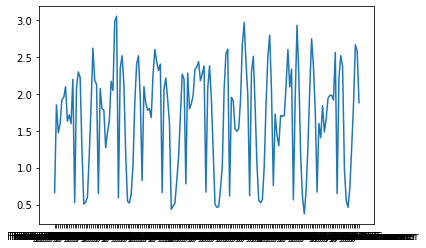

In [411]:
plt.plot(summer_mean_p.iloc[-8,:])

##### Winter

In [412]:
winter_mean_gb = winter.groupby(["ProfileID","Weekday","Hour"])['Unitsread'].apply(lambda x: np.mean(x))

In [413]:
winter_mean_gb.head()

ProfileID  Weekday  Hour
12005372   Friday   0       0.142214
                    1       0.138024
                    2       0.124143
                    3       0.132000
                    4       0.147452
Name: Unitsread, dtype: float64

In [414]:
winter_mean = winter_mean_gb.to_frame()
winter_mean.reset_index(inplace = True)
winter_mean.head()

,ProfileID,Weekday,Hour,Unitsread
0,12005372,Friday,0,0.142214
1,12005372,Friday,1,0.138024
2,12005372,Friday,2,0.124143
3,12005372,Friday,3,0.132000
4,12005372,Friday,4,0.147452


In [415]:
winter_mean["Timestamp"] = winter_mean["Weekday"] + ' ' + winter_mean["Hour"].astype(str) + 'h Winter'

In [416]:
winter_mean.drop(["Weekday", "Hour"], axis = 1, inplace = True)

In [417]:
winter_mean_p = winter_mean.pivot(index='ProfileID', columns='Timestamp', values='Unitsread')

In [418]:
winter_mean_p.head()

Timestamp,Friday 0h Winter,Friday 10h Winter,Friday 11h Winter,Friday 12h Winter,Friday 13h Winter,Friday 14h Winter,Friday 15h Winter,Friday 16h Winter,Friday 17h Winter,Friday 18h Winter,...,Wednesday 22h Winter,Wednesday 23h Winter,Wednesday 2h Winter,Wednesday 3h Winter,Wednesday 4h Winter,Wednesday 5h Winter,Wednesday 6h Winter,Wednesday 7h Winter,Wednesday 8h Winter,Wednesday 9h Winter
ProfileID,,,,,,,,,,,,,,,,,,,,,
12005372,0.142214,0.365095,0.425333,0.518833,0.463310,0.486619,0.486357,0.465667,0.382643,0.417476,...,0.162179,0.155410,0.113667,0.107861,0.106944,0.619667,0.082500,0.215722,0.282944,0.321139
12005376,0.166048,0.784929,0.968000,0.860619,0.804048,0.720238,0.833643,0.981095,1.020381,1.204238,...,0.293051,0.227333,0.115500,0.151556,0.571083,0.621806,0.563139,0.700639,0.462000,0.707361
12005385,0.335238,1.399619,1.472690,1.539738,1.517214,1.383119,1.590024,1.518786,1.891738,3.297905,...,0.529128,0.370051,0.341000,1.198154,1.925000,0.847000,1.072077,1.124821,1.152179,1.634487
12005389,0.724167,1.646071,1.699500,1.860833,2.342738,2.214405,1.906143,1.785929,2.780643,4.398167,...,1.076026,0.860821,1.121154,1.660436,1.300821,1.680179,1.109308,1.243846,1.691744,2.272205
12005398,0.211357,0.135405,0.132786,0.126238,0.129905,0.156095,0.133690,0.130238,0.154262,0.454405,...,0.214923,0.217179,0.206179,0.206462,0.286000,0.431256,0.649846,0.368359,0.155410,0.342410


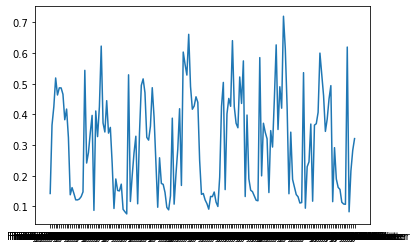

In [419]:
plt.plot(winter_mean_p.iloc[0,:])

##### Spring

In [420]:
spring_mean_gb = spring.groupby(["ProfileID","Weekday","Hour"])['Unitsread'].apply(lambda x: np.mean(x))

In [421]:
spring_mean_gb.head()

ProfileID  Weekday  Hour
12005372   Friday   0       0.251026
                    1       0.254692
                    2       0.232974
                    3       0.227333
                    4       0.229308
Name: Unitsread, dtype: float64

In [422]:
spring_mean = spring_mean_gb.to_frame()
spring_mean.reset_index(inplace = True)
spring_mean.head()

,ProfileID,Weekday,Hour,Unitsread
0,12005372,Friday,0,0.251026
1,12005372,Friday,1,0.254692
2,12005372,Friday,2,0.232974
3,12005372,Friday,3,0.227333
4,12005372,Friday,4,0.229308


In [423]:
spring_mean["Timestamp"] = spring_mean["Weekday"] + ' ' + spring_mean["Hour"].astype(str) + 'h Spring'

In [424]:
spring_mean.drop(["Weekday", "Hour"], axis = 1, inplace = True)

In [425]:
spring_mean_p = spring_mean.pivot(index='ProfileID', columns='Timestamp', values='Unitsread')

In [426]:
spring_mean_p.head()

Timestamp,Friday 0h Spring,Friday 10h Spring,Friday 11h Spring,Friday 12h Spring,Friday 13h Spring,Friday 14h Spring,Friday 15h Spring,Friday 16h Spring,Friday 17h Spring,Friday 18h Spring,...,Wednesday 22h Spring,Wednesday 23h Spring,Wednesday 2h Spring,Wednesday 3h Spring,Wednesday 4h Spring,Wednesday 5h Spring,Wednesday 6h Spring,Wednesday 7h Spring,Wednesday 8h Spring,Wednesday 9h Spring
ProfileID,,,,,,,,,,,,,,,,,,,,,
12005372,0.251026,0.287974,0.404179,0.711333,0.676077,0.385846,0.356231,0.394872,0.389231,0.465103,...,0.253564,0.252718,0.239744,0.234667,0.217462,0.489641,0.276128,0.363000,0.366103,0.342410
12005376,0.198564,0.840231,0.810897,0.927385,0.898615,0.911308,1.069538,1.049231,0.896359,1.234256,...,0.276410,0.238333,0.198282,0.325487,0.498667,0.578205,0.633769,0.686795,0.832615,0.697513
12005385,0.282051,1.085051,1.466667,1.595282,1.096615,0.884795,0.861949,0.831769,0.887333,1.192513,...,0.534205,0.404744,0.313641,0.504026,1.337769,0.610359,0.550000,0.794256,0.985205,1.038795
12005389,0.837128,1.635333,1.456795,1.597538,1.767051,2.091410,2.182231,1.912026,2.266000,2.792872,...,0.956436,0.856590,0.909897,1.262179,0.830359,1.269513,1.257103,1.354974,1.453974,1.782282
12005398,0.229590,0.166128,0.164436,0.163308,0.181359,0.186154,0.172615,0.189458,0.172051,0.227051,...,0.379359,0.315051,0.229872,0.231282,0.222256,0.230154,0.176000,0.157949,0.166410,0.158231


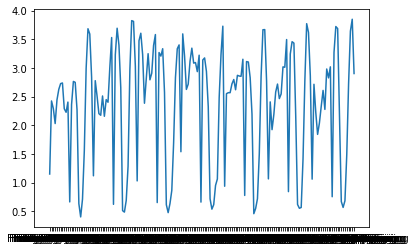

In [427]:
plt.plot(spring_mean_p.iloc[-8,:])

##### Autumn

In [428]:
autumn_mean_gb = autumn.groupby(["ProfileID","Weekday","Hour"])['Unitsread'].apply(lambda x: np.mean(x))

In [429]:
autumn_mean_gb.head()

ProfileID  Weekday  Hour
12005372   Friday   0       0.133128
                    1       0.121282
                    2       0.127205
                    3       0.119026
                    4       0.120718
Name: Unitsread, dtype: float64

In [430]:
autumn_mean = autumn_mean_gb.to_frame()
autumn_mean.reset_index(inplace = True)
autumn_mean.head()

,ProfileID,Weekday,Hour,Unitsread
0,12005372,Friday,0,0.133128
1,12005372,Friday,1,0.121282
2,12005372,Friday,2,0.127205
3,12005372,Friday,3,0.119026
4,12005372,Friday,4,0.120718


In [431]:
autumn_mean["Timestamp"] = autumn_mean["Weekday"] + ' ' + autumn_mean["Hour"].astype(str) + 'h Autumn'

In [432]:
autumn_mean.drop(["Weekday", "Hour"], axis = 1, inplace = True)

In [433]:
autumn_mean_p = autumn_mean.pivot(index='ProfileID', columns='Timestamp', values='Unitsread')

In [434]:
autumn_mean_p.head()

Timestamp,Friday 0h Autumn,Friday 10h Autumn,Friday 11h Autumn,Friday 12h Autumn,Friday 13h Autumn,Friday 14h Autumn,Friday 15h Autumn,Friday 16h Autumn,Friday 17h Autumn,Friday 18h Autumn,...,Wednesday 22h Autumn,Wednesday 23h Autumn,Wednesday 2h Autumn,Wednesday 3h Autumn,Wednesday 4h Autumn,Wednesday 5h Autumn,Wednesday 6h Autumn,Wednesday 7h Autumn,Wednesday 8h Autumn,Wednesday 9h Autumn
ProfileID,,,,,,,,,,,,,,,,,,,,,
12005372,0.133128,0.310750,0.316556,0.392615,0.485128,0.374000,0.341846,0.305179,0.321821,0.283077,...,0.135667,0.120718,0.114513,0.108872,0.106051,0.377949,0.128103,0.158795,0.202795,0.286000
12005376,0.155410,0.614778,0.968306,0.709453,0.914128,0.940359,0.992538,0.838821,0.694128,1.147667,...,0.208436,0.187564,0.181077,0.201103,0.517846,0.586103,0.687077,0.386410,0.476667,0.676077
12005385,0.216897,0.656333,0.843333,0.869470,1.046974,0.900872,0.767462,0.687077,1.143436,1.534246,...,0.308846,0.238897,0.230154,0.752513,0.862513,0.446487,0.319513,0.195744,0.262590,0.498385
12005389,0.790872,1.709889,1.597750,1.600077,2.051077,1.921615,2.279256,2.148385,2.245692,3.070974,...,1.017641,0.781846,0.757590,1.127923,1.063897,1.308718,1.083205,1.179821,1.521103,1.498256
12005398,0.213513,0.161944,0.167103,0.159923,0.159359,0.163308,0.166974,0.159077,0.167538,0.261154,...,0.219436,0.215769,0.223667,0.220564,0.219718,0.243410,0.216333,0.145538,0.144128,0.144128


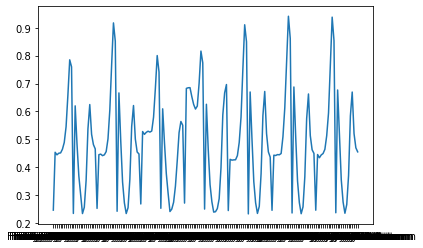

In [444]:
plt.plot(autumn_mean_p.mean(axis = 0))

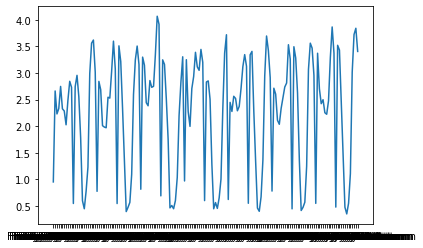

In [435]:
plt.plot(autumn_mean_p.iloc[-8,:])

### Merging the data into one dataset

In [436]:
sa_analysis = pd.concat([winter_mean_p, summer_mean_p, spring_mean_p, autumn_mean_p], axis=1)

In [437]:
sa_analysis.head()

Timestamp,Friday 0h Winter,Friday 10h Winter,Friday 11h Winter,Friday 12h Winter,Friday 13h Winter,Friday 14h Winter,Friday 15h Winter,Friday 16h Winter,Friday 17h Winter,Friday 18h Winter,...,Wednesday 22h Autumn,Wednesday 23h Autumn,Wednesday 2h Autumn,Wednesday 3h Autumn,Wednesday 4h Autumn,Wednesday 5h Autumn,Wednesday 6h Autumn,Wednesday 7h Autumn,Wednesday 8h Autumn,Wednesday 9h Autumn
ProfileID,,,,,,,,,,,,,,,,,,,,,
12005372,0.142214,0.365095,0.425333,0.518833,0.463310,0.486619,0.486357,0.465667,0.382643,0.417476,...,0.135667,0.120718,0.114513,0.108872,0.106051,0.377949,0.128103,0.158795,0.202795,0.286000
12005376,0.166048,0.784929,0.968000,0.860619,0.804048,0.720238,0.833643,0.981095,1.020381,1.204238,...,0.208436,0.187564,0.181077,0.201103,0.517846,0.586103,0.687077,0.386410,0.476667,0.676077
12005385,0.335238,1.399619,1.472690,1.539738,1.517214,1.383119,1.590024,1.518786,1.891738,3.297905,...,0.308846,0.238897,0.230154,0.752513,0.862513,0.446487,0.319513,0.195744,0.262590,0.498385
12005389,0.724167,1.646071,1.699500,1.860833,2.342738,2.214405,1.906143,1.785929,2.780643,4.398167,...,1.017641,0.781846,0.757590,1.127923,1.063897,1.308718,1.083205,1.179821,1.521103,1.498256
12005398,0.211357,0.135405,0.132786,0.126238,0.129905,0.156095,0.133690,0.130238,0.154262,0.454405,...,0.219436,0.215769,0.223667,0.220564,0.219718,0.243410,0.216333,0.145538,0.144128,0.144128


In [440]:
sa_analysis.to_csv(r"..\Data\SAdata\SA_revised.csv", sep = ",")